  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  
      invoice_no customer_id  gender  age         category  quantity    price  \
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food 

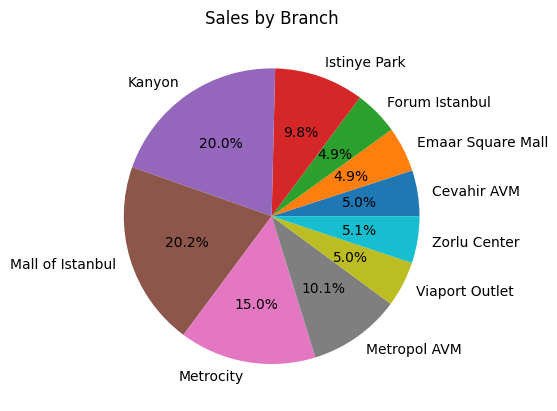

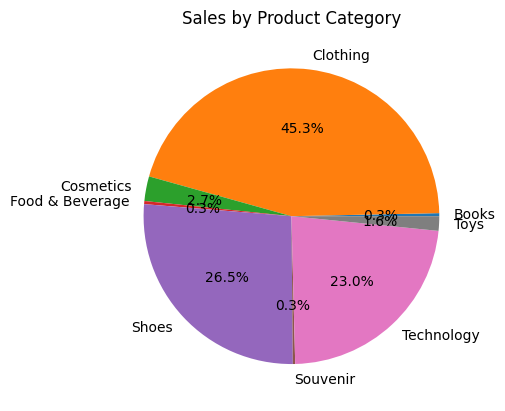

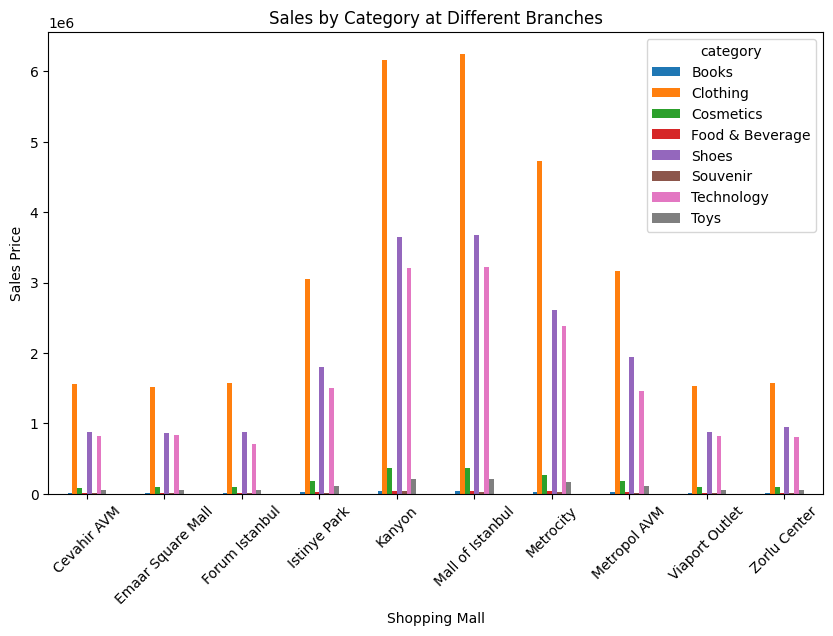

In [1]:
# Title: Analyzing Sales Performance by Region in a Retail Company

import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("customer_shopping_data.csv")

# Display initial and final records
print(df.head())
print(df.tail())

# Sales count by shopping mall
mall_counts = df.groupby("shopping_mall").count()
print(mall_counts)

# Sales count by product category
category_counts = df.groupby("category").count()
print(category_counts)

# Total sales by mall
branch_sales = df.groupby("shopping_mall").sum()
print(branch_sales)

# Total sales by category
category_sales = df.groupby("category").sum()
print(category_sales)

# Top performing branches
top_branches = branch_sales.sort_values(by="price", ascending=False)
print(top_branches)

# Top selling categories
top_categories = category_sales.sort_values(by="price", ascending=False)
print(top_categories)

# Total sales by branch and product category
combined_sales = df.groupby(["shopping_mall", "category"]).sum()
print(combined_sales)

# Pie chart for sales by branch
plt.pie(branch_sales["price"], labels=branch_sales.index, autopct='%1.1f%%')
plt.title("Sales by Branch")
plt.show()

# Pie chart for sales by product category
plt.pie(category_sales["price"], labels=category_sales.index, autopct='%1.1f%%')
plt.title("Sales by Product Category")
plt.show()

# Combined sales pivot table for bar chart
combined_pivot = df.pivot_table(index="shopping_mall", columns="category", values="price", aggfunc="sum")
combined_pivot.plot(kind="bar", figsize=(10, 6))
plt.title("Sales by Category at Different Branches")
plt.ylabel("Sales Price")
plt.xlabel("Shopping Mall")
plt.xticks(rotation=45)
plt.show()
